### Ejercicio 1: El fractal de Newton

(Ejercicio tomado de un curso de David P. Sanders)

Este ejercicio tiene dos objetivos. Que implementen el método de Newton para una variable (real o compleja) para buscar ceros de una función $f(x)$ dando *también* su derivada, y que construyan un fractal usándolo.

Recordemos primero qué es el método de Newton (o Newton-Raphson) en una variable, para encontrar las raíces (ceros) de una función no lineal $f(x)$. El método de Newton es un método iterativo definido por:

$$
x_{n+1}=x_n−\frac{f(x_n)}{f′(x_n)},
$$

a partir de una *condición inicial* $x_0$ dada. (Cualquier libro de cálculo 1 es buena referencia para la construcción.) Lo importante es que $x_{n+1}$, se construye a partir del anterior, usando la función $f(x)$ (cuyas raíces queremos encontrar) y *también* su derivada $f'(x)$. 

El *teorema* dice que si $x_0$ está suficientemente cerca de $x^*$, donde $f(x^*)=0$, entonces $x_n \to x^*$ cuando $n\to\infty$.

1. Implementen una función para encontrar las raíces de una función arbitraria $f(x)$. En particular, consideren $f(x) = x^2 - 2$. (Para escribir $f'(x)$ con caracteres Unicode, simplemente escriba `f\prime<TAB>`.) *HINT:* Como a priori no sabemos si la condición inicial conviene o no, vale la pena poner un tope superior al número de iteraciones del método de Newton.

2. Usa el método de Newton para encontrar las raíces cúbicas de 1, o sea, $g(z) = z^3-1$. Empezando con una malla de condiciones iniciales $z_0$ (en el plano complejo), determina a donde converge cada condición inicial. Guarden los resultados en una matriz: $N_{i,j} = z_{end}(z_0)$, donde $(i,j)$ identifican el punto en la malla. (Algo importante es que en Julia las matrices se almacenan corriendo sobre los renglones, es decir, primero se almacena la primer columna, luego la segunda, etc. Saber esto puede hacer que logren hacer correr las cosas de manera *eficiente*.)

3. Grafiquen los resultados usando `imshow`, `pcolor` y/o `pcolormesh` definidos en `PyPlot`; lean la documentación para ver cómo usar la instrucción que ustedes elijan.

4. ¿Qué modificaciones puedes hacer para hacer ampliaciones? Haz un par de ejemplos. ¿Tiene sentido el uso de la palbra "fractal"?

(Pueden experimentar también con otras funciones complejas, otros polinomios, o `sin`.)

---

In [2]:
using PyPlot;

Las siguientes  celdas muestran el primer paso para resolver el ejercicio completo. Encontramos "a mano" las raíces de la función  $f(x)=x^2-2$.

La primer celda muestra el método de Newton implementado, el ciclo principal es **while**, y los siguientes **if´s ** son  para imprimir las cosas en la pantalla de una manera mas "limpia".

La segunda celda calcula las raíces de dicha función.

In [22]:
f(x)=x^4-1
f′(x)=4x^3
function newton(x)
    n=1500 #numero máximo de iteraciones
    ϵ=1e-10
    i=0
    
    while abs(f(x))>ϵ
        i=i+1
        x=x-f(x)/f′(x)
       # println(f(x))
        if i==n
            break
        end
    end
    y=f(x)
    
    if typeof(x)==Complex{Float64}
        if abs(real(x))<1e-8
            x=x-real(x)
        end 
        if abs(imag(x))<1e-8
            x=x-imag(x)im
        end 
    end 
    if typeof(y)==Complex{Float64}
        if abs(real(y))<1e-8
            y=y-real(y)
        end 
        if abs(imag(y))<1e-8
            y=y-imag(y)im
        end 
    end 
    println("se hicieron ",i, " iteraciones"),println("La raíz aproximada es ",x)
   # if abs(f(x))<1e-8
   #     println ("El valor de la función ahí es ", 0)
    #else
    println ("El valor de la función ahí es ",y)
    #end
    if i==n
        println("Se hicieron demasiadas iteraciones, quizás el método no converge con la condición inicial usada.")
    end 
  
end ;

In [23]:
newton(-0.45+0.234im),newton(2-2im) #encontramos "a mano" las tres raíces

se hicieron 8 iteraciones
La raíz aproximada es 0.0 - 1.0000000000000007im
El valor de la función ahí es 0.0 + 0.0im
se hicieron 1500 iteraciones
La raíz aproximada es 4.234056194756988 - 4.234056194756988im
El valor de la función ahí es -1286.5425687004306 + 0.0im
Se hicieron demasiadas iteraciones, quizás el método no converge con la condición inicial usada.


(nothing,nothing)

A continuación hice algunas modificaciones a la función definida para el métdodo de Newton de tal forma que la tarea ahora es encontrar las raíces de la función $f(z)=z^3-1$. Posteriormente defino una malla de condiciones iniciales en el plano complejo. Tal malla está definida en el intervalo (-30,30) sobre el eje real y en el intervalo (-30,30) sobre el eje imaginario. Se toman los puntos de esta malla como condiciones iniciales para encontrar las raíces de la función con el método de Newton y los resultados se guardan en una matriz $N$

In [24]:
function newton(x,f,f\prime)
    n=1000 #numero máximo de iteraciones
    ϵ=1e-10
    i=0

    
    while abs(f(x))>ϵ
        i=i+1
        x=x-f(x)/f′(x)
        if i==n
            break
        end
    end
    
    return x
    
end;

In [25]:
f(x)=x^4
f′(x)=4x^3

f′ (generic function with 1 method)

In [26]:
newton(3-3im,f,f′)

0.0016932227808712508 - 0.0016932227808712508im

In [27]:
f(x)=x^3-1
f′(x)=3x^2#Se define la  función (y su derivada) de la cual se desean conocer las raíces. 

n=1000 #numero de puntos en la malla
z0=zeros(Complex,n,n)
arr=linspace(-30,30,n)  #La malla está definida en el plano complejo y va es el producto cartesiano [-30,30]x[-30i,30i]
for i in 1:length(arr)
    for j in 1:length(arr)
        z0[i,j]=arr[j]-arr[i]im
    end 
end
N=zeros(Complex,n,n)
for i in 1:n
    [N[i,j]=newton(z0[i,j],f,f′) for j in 1:n]
end;

Con la siguiente celda se construye una grafica utilizando la función definida en PyPlot ```imshow()```. Esta función toma los elementos de la matriz $N$, y les asigna un color dependiendo del valor numérico que tenga la entrada. Como tenemos tres raíces para la función $f(z)=z^3-1$, esperamos que solo obtengamos una gráfica con tres colores.

Una **observación importante** que debe hacerse es que, para poder utilizar la funcion ```imshow()```, ***sólo se toma la parte imaginaria de la matriz $N$***, con la función ```imag(N)```. Esto es suficiente para conocer como se comporta la malla de condiciones iniciales de acuerdo al teorema fundamental del álgebra, que nos dice que si un numero complejo $x+iy$ es raíz del polinomio (o en general una función compleja) $f(z)$, entonces su complejo conjugado $x-iy$ también es raíz.




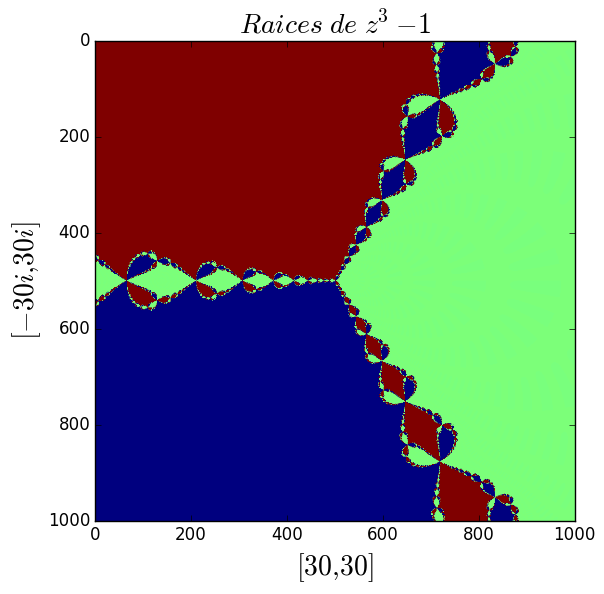

In [28]:
imshow(imag(N))
title(L"Raices \ de  \ z^3-1 ",size=20)
xlabel(L"[30,30]",size=20)
ylabel(L"[-30i,30i]",size=20)
#axis("off");

En esta gráfica vemos que los elementos de plano complejo en la malla $[-30,30]x[-30i,30i]$ se divide en tres regiones principales con algunas "subregiones" que nos idican a que raíz convergen tales puntos utilizando el métod de Newton. 

La región roja converge a la raíz $-0.5+0.866025i$, la azul a la raíz $-0.5-0.866025i$, y la verde a $1+0i$.

Para ver el comportalmiento *fractal*, hice dos zooms con *subplot* en la siguiente celda:


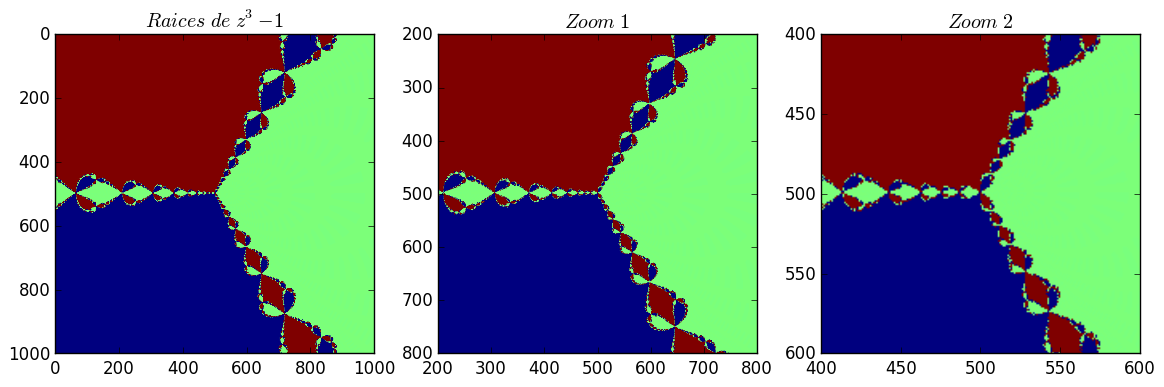

In [29]:
figure("pyplot_subplot_mixed",figsize=(14,7))

subplot(131)
#grid("on")
imshow(imag(N))
#axis([0,100,0,1])
title(L"Raices \ de \ z^3-1 ")

subplot(132)
title(L"Zoom \ 1 ")
imshow(imag(N))
axis([200,800,800,200])


subplot(133)
imshow(imag(N))
title(L"Zoom \ 2")
axis([400,600,600,400]);



A continuación implemento el mismo procedimiento para encontrar los fractales generados por otras funciones.

In [61]:
f(x)=x^4-1
f′(x)=4x^3

f′ (generic function with 1 method)

In [63]:
function newtonprueba(x)
    n=1000 #numero máximo de iteraciones
    ϵ=1e-10
    i=0
    
    while abs(f(x))>ϵ
        i=i+1
        x=x-f(x)/f′(x)
        if i==n
            break
        end
    end
    
    return x
    
end;

In [64]:
#Se define la  función (y su derivada) de la cual se desean conocer las raíces. 

n=100 #numero de puntos en la malla
z0=zeros(Complex,n,n)
arr=linspace(-4,4,n)  #La malla está definida en el plano complejo y va es el producto cartesiano [-30,30]x[-30i,30i]
for i in 1:length(arr)
    for j in 1:length(arr)
        z0[i,j]=arr[j]-arr[i]im
    end 
end
N=zeros(Complex,n,n)
for i in 1:n
    [N[i,j]=newtonprueba(z0[i,j]) for j in 1:n]
end;

In [65]:
N

100x100 Array{Complex{T<:Real},2}:
      -352.715+352.715im  …       352.715+352.715im
    4.5867e-16-1.0im          -4.5867e-16-1.0im    
 -1.0-4.53766e-16im          1.0-4.53766e-16im     
 -1.0-9.56404e-19im          1.0-9.56404e-19im     
  -1.39304e-14+1.0im          1.39304e-14+1.0im    
   -2.1936e-18+1.0im      …    2.1936e-18+1.0im    
  -1.40622e-12+1.0im          1.40622e-12+1.0im    
  -8.32737e-17+1.0im          8.32737e-17+1.0im    
 -1.0-7.35929e-14im          1.0-7.35929e-14im     
  -5.97004e-14+1.0im          5.97004e-14+1.0im    
   8.28938e-22+1.0im      …  -8.28938e-22+1.0im    
   3.63383e-14+1.0im         -3.63383e-14+1.0im    
   1.31757e-12-1.0im         -1.31757e-12-1.0im    
              ⋮           ⋱                        
   3.63383e-14-1.0im         -3.63383e-14-1.0im    
   8.28938e-22-1.0im         -8.28938e-22-1.0im    
  -5.97004e-14-1.0im      …   5.97004e-14-1.0im    
 -1.0+7.35929e-14im          1.0+7.35929e-14im     
  -8.32737e-17-1.0im         

No se por que  me imprime esto, una pantalla verde: **(ayuda!)**

Creo que tiene que ver con la convergencia de mi método implementado :


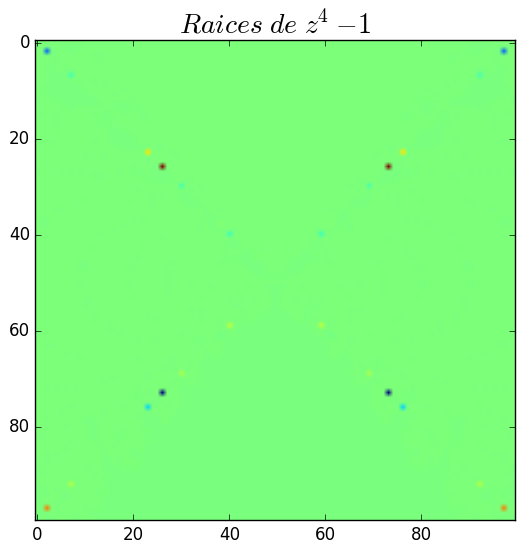

In [66]:
imshow(imag(N))
title(L"Raices \ de  \ z^4-1 ",size=20);

In [33]:
f(x)=sin(x)-1
f′(x)=cos(x)#Se define la  función (y su derivada) de la cual se desean conocer las raíces. 

n=200 #numero de puntos en la malla
z0=zeros(Complex,n,n)
arr=linspace(-3,3,n)  #La malla está definida en el plano complejo y va es el producto cartesiano [-30,30]x[-30i,30i]
for i in 1:length(arr)
    for j in 1:length(arr)
        z0[i,j]=arr[j]-arr[i]im
    end 
end
N=zeros(Complex,n,n)
for i in 1:n
    [N[i,j]=newton(z0[i,j],f,f′) for j in 1:n]
end


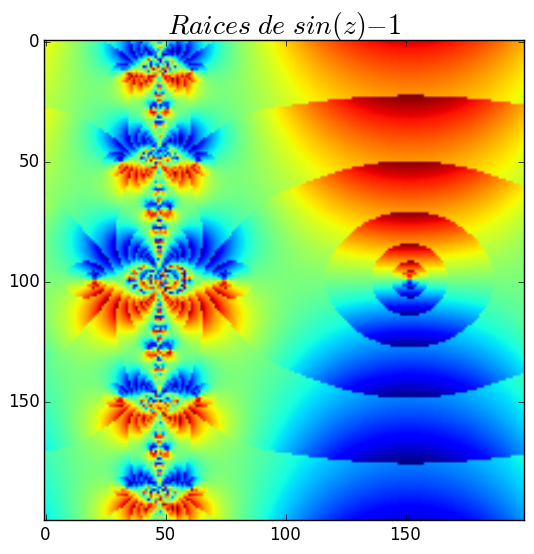

In [34]:
imshow(imag(N))
title(L"Raices \ de  \ sin(z)-1 ",size=20);

In [46]:
f(x)=sin(x)-1
f′(x)=cos(x)#Se define la  función (y su derivada) de la cual se desean conocer las raíces. 

n=1000 #numero de puntos en la malla
z0=zeros(Complex,n,n)
arr=linspace(-3,3,n)  #La malla está definida en el plano complejo y va es el producto cartesiano [-30,30]x[-30i,30i]
for i in 1:length(arr)
    for j in 1:length(arr)
        z0[i,j]=arr[j]-arr[i]im
    end 
end
N=zeros(Complex,n,n)
for i in 1:n
    [N[i,j]=newton(z0[i,j],f,f′) for j in 1:n]
end

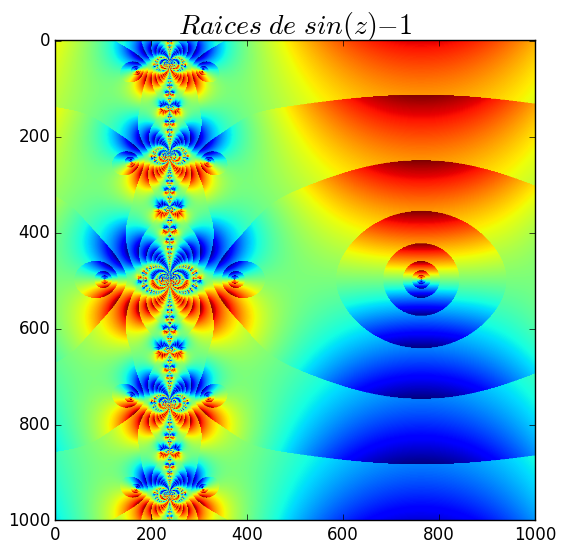

In [47]:
imshow(imag(N))
title(L"Raices \ de  \ sin(z)-1 ",size=20);

### Ejercicio 2: Operadores como funciones

- ¿Qué pasa si sumas dos cadenas (*strings*)?

- ¿Qué pasa si multiplicas dos cadenas (*strings*)?

- Contruye una función *específica* que sume dos cadenas

---

In [25]:
c1="Tom"
c2="Brady"
c3="Best"
c4="Ever"

"Ever"

In [26]:
c1+c2

LoadError: `+` has no method matching +(::ASCIIString, ::ASCIIString)
while loading In[26], in expression starting on line 1

In [27]:
c1*c2

"TomBrady"

In [28]:
import Base .+
+(a::String,b::String)=a*b

+ (generic function with 118 methods)

In [29]:
c1+c2+c3+c4

"TomBradyBestEver"

### Ejercicio 3: Diferenciación automática

En clase vimos cómo definir estructuras "tipo" (*types*), y los conceptos básicos atrás de los `Duales` que sirven para implementar la diferenciación automática. 

El objetido de este ejercicio es que construyan un *módulo* que permita calcular primeras derivadas de manera más exacta que permita la computadora, o sea, que el error sea del orden del *epsilon* local de la máquina.

1. Define el tipo (estructura) `Dual` que contenga dos campos, el valor de la función y el valor de su derivada. Haz que *ambos* campos tengan el mismo tipo de valor, y que ambos *tengan* que ser un subtipo de `Real`.

- Define métodos para que el dual de un número (sólo *un* número) sea lo que uno espera, y una función `dual_var(x0)` que retorne un dual que represente a la variable *independiente* en `x0`.

- Define métodos que sumen, resten, multipliquen y dividan duales, y números con duales. Incluye los casos (para duales) en que los operadores `+` y `-` actúan sólo sobre un `Dual`.

- Incluye extensiones de las funciones elementales más usuales (`^`, `exp`, `log`, `sin`, `cos`, `sqrt`, etc).

- Muestra que el error numérico de lo que has hecho es esencialmente el epsilon de la máquina. Para esto define alguna función $f(x)$ y aplícala sobre `x = dual_var(x0)`, y muestra que el error es del orden del epsilon de la máquina al rededor del valor verdadero de la derivada.

- Acompaña tu módulo de un archivo "runtest.jl" donde haya casos (no triviales) que permitan verificar que tu módulo hace las cosas correctamente.

- Extiende la función para el método de Newton para que funcione sólo dando la función, y que la derivada la obtenga usando las herramientas del módulo.


---